## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(input_layer)
    x = keras.layers.Dense(units=128, activation="relu")(input_layer)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

# model = build_mlp()

In [5]:
# """
# Compile 模型
# """
# model.summary()

# model = build_mlp()
# # 用 Keras 內建方法檢視模型各層參數量
# model.summary()

# optimizer = keras.optimizers.Adam(lr=0.001)
# model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
# """
# 設定要訓練的 Epoch 數
# """
# model.fit(x_train, y_train, 
#           epochs=, 
#           batch_size=256, 
#           validation_data=(x_test, y_test), 
#           shuffle=True)

In [7]:
# import matplotlib.pyplot as plt
# # 以視覺畫方式檢視訓練過程

# train_loss = model.history.history["loss"]
# valid_loss = model.history.history["val_loss"]

# train_acc = model.history.history["acc"]
# valid_acc = model.history.history["val_acc"]

# plt.plot(range(len(train_loss)), train_loss, label="train loss")
# plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
# plt.legend()
# plt.title("Loss")
# plt.show()

# plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
# plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
# plt.legend()
# plt.title("Accuracy")
# plt.show()


In [8]:
import matplotlib.pyplot as plt

def calc(opt, epochs):
    model = build_mlp()
    model.summary()

    model = build_mlp()
    # 用 Keras 內建方法檢視模型各層參數量
    model.summary()
    if opt == 'adam':
        optimizer = keras.optimizers.Adam(lr=0.001)
    else:
        optimizer = keras.optimizers.SGD(lr=0.001)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
          epochs= epochs, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]

    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()

W0714 13:09:23.232960 11492 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 13:09:23.283971 11492 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 13:09:23.297967 11492 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               393344    
_________________________________________________________________
dens

W0714 13:09:23.699089 11492 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 13:09:23.739097 11492 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0714 13:09:24.097234 11492 deprecation.py:323] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0714 13:09:24.290676 11492 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 18s 356us/step - loss: 1.9981 - acc: 0.2881 - val_loss: 1.8614 - val_acc: 0.3347
Epoch 2/500
50000/50000 [==============================] - 11s 221us/step - loss: 1.8210 - acc: 0.3580 - val_loss: 1.7815 - val_acc: 0.3765
Epoch 3/500
50000/50000 [==============================] - 10s 192us/step - loss: 1.7699 - acc: 0.3781 - val_loss: 1.7551 - val_acc: 0.3809
Epoch 4/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.7360 - acc: 0.3878 - val_loss: 1.7298 - val_acc: 0.3912
Epoch 5/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.7159 - acc: 0.3983 - val_loss: 1.7133 - val_acc: 0.4000
Epoch 6/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.6932 - acc: 0.4060 - val_loss: 1.7126 - val_acc: 0.3943
Epoch 7/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.6786 - acc: 0.4110 - val_loss:

50000/50000 [==============================] - 9s 184us/step - loss: 1.4816 - acc: 0.4776 - val_loss: 1.5632 - val_acc: 0.4497
Epoch 59/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.4785 - acc: 0.4790 - val_loss: 1.5543 - val_acc: 0.4548
Epoch 60/500
50000/50000 [==============================] - 9s 187us/step - loss: 1.4754 - acc: 0.4796 - val_loss: 1.6049 - val_acc: 0.4418
Epoch 61/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.4744 - acc: 0.4804 - val_loss: 1.5538 - val_acc: 0.4512
Epoch 62/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.4732 - acc: 0.4787 - val_loss: 1.5682 - val_acc: 0.4482
Epoch 63/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.4759 - acc: 0.4807 - val_loss: 1.5542 - val_acc: 0.4532
Epoch 64/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.4698 - acc: 0.4811 - val_loss: 1.5576 - val_acc: 0.4510
Epoch 65/500
50000/50000 [=======

50000/50000 [==============================] - 9s 182us/step - loss: 1.4315 - acc: 0.4924 - val_loss: 1.5594 - val_acc: 0.4506
Epoch 114/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.4303 - acc: 0.4914 - val_loss: 1.6284 - val_acc: 0.4250
Epoch 115/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.4369 - acc: 0.4898 - val_loss: 1.5740 - val_acc: 0.4384
Epoch 116/500
50000/50000 [==============================] - 10s 190us/step - loss: 1.4364 - acc: 0.4922 - val_loss: 1.5680 - val_acc: 0.4497
Epoch 117/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.4307 - acc: 0.4942 - val_loss: 1.5874 - val_acc: 0.4441
Epoch 118/500
50000/50000 [==============================] - 11s 213us/step - loss: 1.4269 - acc: 0.4941 - val_loss: 1.5543 - val_acc: 0.4515
Epoch 119/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.4293 - acc: 0.4931 - val_loss: 1.5782 - val_acc: 0.4406
Epoch 120/500
50000/5000

50000/50000 [==============================] - 16s 318us/step - loss: 1.4120 - acc: 0.4974 - val_loss: 1.5854 - val_acc: 0.4377
Epoch 171/500
50000/50000 [==============================] - 15s 303us/step - loss: 1.4064 - acc: 0.5024 - val_loss: 1.5717 - val_acc: 0.4461
Epoch 172/500
50000/50000 [==============================] - 12s 239us/step - loss: 1.4059 - acc: 0.5012 - val_loss: 1.5924 - val_acc: 0.4351
Epoch 173/500
50000/50000 [==============================] - 10s 194us/step - loss: 1.3979 - acc: 0.5047 - val_loss: 1.5837 - val_acc: 0.4394
Epoch 174/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.4078 - acc: 0.5018 - val_loss: 1.5699 - val_acc: 0.4446ET - ETA: 3s - loss: 1.4117 - acc: 0.49 - E
Epoch 175/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.4032 - acc: 0.5030 - val_loss: 1.6019 - val_acc: 0.4315
Epoch 176/500
50000/50000 [==============================] - 9s 189us/step - loss: 1.4069 - acc: 0.5022 - val_loss: 1.5

50000/50000 [==============================] - 16s 316us/step - loss: 1.3874 - acc: 0.5086 - val_loss: 1.6039 - val_acc: 0.4341- loss - ETA: 3s - loss: 1.3796 - ac
Epoch 227/500
50000/50000 [==============================] - 14s 284us/step - loss: 1.3917 - acc: 0.5088 - val_loss: 1.5933 - val_acc: 0.4442
Epoch 228/500
50000/50000 [==============================] - 11s 228us/step - loss: 1.3862 - acc: 0.5083 - val_loss: 1.5798 - val_acc: 0.4435
Epoch 229/500
50000/50000 [==============================] - 12s 237us/step - loss: 1.3916 - acc: 0.5040 - val_loss: 1.5709 - val_acc: 0.4425
Epoch 230/500
50000/50000 [==============================] - 11s 227us/step - loss: 1.3782 - acc: 0.5123 - val_loss: 1.6004 - val_acc: 0.4419
Epoch 231/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.3883 - acc: 0.5064 - val_loss: 1.5930 - val_acc: 0.4435
Epoch 232/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.3849 - acc: 0.5111 - val_loss: 1.5791 - 

50000/50000 [==============================] - 12s 238us/step - loss: 1.3696 - acc: 0.5136 - val_loss: 1.6051 - val_acc: 0.4372
Epoch 284/500
50000/50000 [==============================] - 15s 297us/step - loss: 1.3708 - acc: 0.5119 - val_loss: 1.5922 - val_acc: 0.44241 - acc: 0.512 - ETA: 0s - loss: 1.3691 - acc: 0
Epoch 285/500
50000/50000 [==============================] - 13s 258us/step - loss: 1.3704 - acc: 0.5136 - val_loss: 1.5921 - val_acc: 0.4433
Epoch 286/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.3691 - acc: 0.5141 - val_loss: 1.6119 - val_acc: 0.4328
Epoch 287/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.3682 - acc: 0.5139 - val_loss: 1.5837 - val_acc: 0.4402
Epoch 288/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.3729 - acc: 0.5120 - val_loss: 1.6119 - val_acc: 0.4349
Epoch 289/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.3679 - acc: 0.5158 - val_loss: 

50000/50000 [==============================] - 12s 242us/step - loss: 1.3586 - acc: 0.5153 - val_loss: 1.6101 - val_acc: 0.4359
Epoch 340/500
50000/50000 [==============================] - 10s 192us/step - loss: 1.3573 - acc: 0.5181 - val_loss: 1.6071 - val_acc: 0.4363
Epoch 341/500
50000/50000 [==============================] - 10s 204us/step - loss: 1.3561 - acc: 0.5186 - val_loss: 1.6146 - val_acc: 0.4341
Epoch 342/500
50000/50000 [==============================] - 9s 190us/step - loss: 1.3547 - acc: 0.5192 - val_loss: 1.5971 - val_acc: 0.4388
Epoch 343/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.3541 - acc: 0.5179 - val_loss: 1.6121 - val_acc: 0.4409
Epoch 344/500
50000/50000 [==============================] - 13s 269us/step - loss: 1.3503 - acc: 0.5205 - val_loss: 1.5946 - val_acc: 0.4400
Epoch 345/500
50000/50000 [==============================] - 13s 268us/step - loss: 1.3610 - acc: 0.5171 - val_loss: 1.6029 - val_acc: 0.4349
Epoch 346/500
50000/5

50000/50000 [==============================] - 9s 188us/step - loss: 1.3428 - acc: 0.5214 - val_loss: 1.6126 - val_acc: 0.4372
Epoch 396/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.3432 - acc: 0.5204 - val_loss: 1.6179 - val_acc: 0.4379
Epoch 397/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.3464 - acc: 0.5216 - val_loss: 1.6082 - val_acc: 0.4391
Epoch 398/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.3429 - acc: 0.5220 - val_loss: 1.6174 - val_acc: 0.4361
Epoch 399/500
50000/50000 [==============================] - 10s 191us/step - loss: 1.3402 - acc: 0.5227 - val_loss: 1.5926 - val_acc: 0.4436
Epoch 400/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.3448 - acc: 0.5209 - val_loss: 1.6126 - val_acc: 0.4333
Epoch 401/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.3412 - acc: 0.5235 - val_loss: 1.6043 - val_acc: 0.4412
Epoch 402/500
50000/50000 

50000/50000 [==============================] - 8s 169us/step - loss: 1.3355 - acc: 0.5260 - val_loss: 1.6133 - val_acc: 0.4402
Epoch 454/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.3319 - acc: 0.5258 - val_loss: 1.6343 - val_acc: 0.4330
Epoch 455/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.3345 - acc: 0.5273 - val_loss: 1.6245 - val_acc: 0.4395
Epoch 456/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.3338 - acc: 0.5262 - val_loss: 1.6187 - val_acc: 0.4341
Epoch 457/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.3317 - acc: 0.5268 - val_loss: 1.6161 - val_acc: 0.4380
Epoch 458/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.3313 - acc: 0.5250 - val_loss: 1.6299 - val_acc: 0.4368
Epoch 459/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.3325 - acc: 0.5253 - val_loss: 1.6202 - val_acc: 0.4351
Epoch 460/500
50000/50000 [

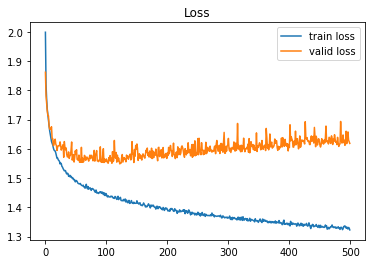

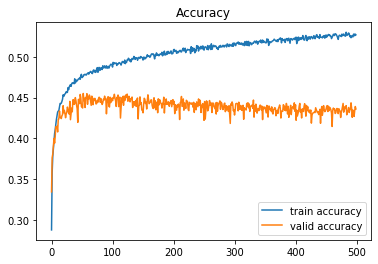

In [9]:
calc('adam', 500)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               393344    
_________________________________________________________________
dens

50000/50000 [==============================] - 9s 176us/step - loss: 1.7637 - acc: 0.3905 - val_loss: 1.7682 - val_acc: 0.3860
Epoch 48/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.7613 - acc: 0.3919 - val_loss: 1.7670 - val_acc: 0.3884
Epoch 49/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.7590 - acc: 0.3935 - val_loss: 1.7641 - val_acc: 0.3878
Epoch 50/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.7565 - acc: 0.3934 - val_loss: 1.7616 - val_acc: 0.3893
Epoch 51/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.7542 - acc: 0.3947 - val_loss: 1.7600 - val_acc: 0.3902
Epoch 52/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.7520 - acc: 0.3952 - val_loss: 1.7577 - val_acc: 0.3897
Epoch 53/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.7497 - acc: 0.3966 - val_loss: 1.7556 - val_acc: 0.3904
Epoch 54/500
50000/50000 [=======

50000/50000 [==============================] - 8s 170us/step - loss: 1.6584 - acc: 0.4299 - val_loss: 1.6699 - val_acc: 0.4239
Epoch 106/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.6571 - acc: 0.4303 - val_loss: 1.6690 - val_acc: 0.4230
Epoch 107/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.6558 - acc: 0.4313 - val_loss: 1.6674 - val_acc: 0.4249
Epoch 108/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.6543 - acc: 0.4318 - val_loss: 1.6669 - val_acc: 0.4249
Epoch 109/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.6528 - acc: 0.4322 - val_loss: 1.6646 - val_acc: 0.4253
Epoch 110/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.6513 - acc: 0.4321 - val_loss: 1.6638 - val_acc: 0.4255
Epoch 111/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.6500 - acc: 0.4323 - val_loss: 1.6619 - val_acc: 0.4244
Epoch 112/500
50000/50000 [

50000/50000 [==============================] - 8s 162us/step - loss: 1.5878 - acc: 0.4560 - val_loss: 1.6078 - val_acc: 0.4419
Epoch 164/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.5867 - acc: 0.4571 - val_loss: 1.6064 - val_acc: 0.4416
Epoch 165/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.5858 - acc: 0.4568 - val_loss: 1.6051 - val_acc: 0.4445
Epoch 166/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.5849 - acc: 0.4571 - val_loss: 1.6054 - val_acc: 0.4456
Epoch 167/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.5838 - acc: 0.4574 - val_loss: 1.6044 - val_acc: 0.4453
Epoch 168/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.5827 - acc: 0.4586 - val_loss: 1.6041 - val_acc: 0.4427
Epoch 169/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.5816 - acc: 0.4577 - val_loss: 1.6042 - val_acc: 0.4453
Epoch 170/500
50000/50000 [

50000/50000 [==============================] - 8s 160us/step - loss: 1.5378 - acc: 0.4734 - val_loss: 1.5664 - val_acc: 0.4577
Epoch 222/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.5370 - acc: 0.4743 - val_loss: 1.5660 - val_acc: 0.4569
Epoch 223/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.5363 - acc: 0.4736 - val_loss: 1.5660 - val_acc: 0.4542
Epoch 224/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.5356 - acc: 0.4740 - val_loss: 1.5650 - val_acc: 0.4574
Epoch 225/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.5347 - acc: 0.4750 - val_loss: 1.5640 - val_acc: 0.4588
Epoch 226/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.5341 - acc: 0.4747 - val_loss: 1.5643 - val_acc: 0.4573
Epoch 227/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.5333 - acc: 0.4749 - val_loss: 1.5628 - val_acc: 0.4610
Epoch 228/500
50000/50000 [

50000/50000 [==============================] - 8s 163us/step - loss: 1.4992 - acc: 0.4854 - val_loss: 1.5369 - val_acc: 0.4671
Epoch 280/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.4985 - acc: 0.4865 - val_loss: 1.5373 - val_acc: 0.4664
Epoch 281/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.4979 - acc: 0.4869 - val_loss: 1.5362 - val_acc: 0.4679
Epoch 282/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.4973 - acc: 0.4870 - val_loss: 1.5358 - val_acc: 0.4698
Epoch 283/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.4967 - acc: 0.4871 - val_loss: 1.5357 - val_acc: 0.4702
Epoch 284/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.4961 - acc: 0.4869 - val_loss: 1.5353 - val_acc: 0.4673
Epoch 285/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.4955 - acc: 0.4873 - val_loss: 1.5343 - val_acc: 0.4680
Epoch 286/500
50000/50000 [

50000/50000 [==============================] - 8s 165us/step - loss: 1.4668 - acc: 0.4970 - val_loss: 1.5153 - val_acc: 0.4748
Epoch 338/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.4663 - acc: 0.4962 - val_loss: 1.5151 - val_acc: 0.4736
Epoch 339/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.4659 - acc: 0.4966 - val_loss: 1.5130 - val_acc: 0.4739
Epoch 340/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.4653 - acc: 0.4973 - val_loss: 1.5127 - val_acc: 0.4752
Epoch 341/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.4648 - acc: 0.4974 - val_loss: 1.5121 - val_acc: 0.4738
Epoch 342/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.4641 - acc: 0.4984 - val_loss: 1.5118 - val_acc: 0.4759
Epoch 343/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.4637 - acc: 0.4979 - val_loss: 1.5118 - val_acc: 0.4747
Epoch 344/500
50000/50000 [

50000/50000 [==============================] - 8s 164us/step - loss: 1.4381 - acc: 0.5066 - val_loss: 1.4948 - val_acc: 0.4813
Epoch 396/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.4375 - acc: 0.5061 - val_loss: 1.4944 - val_acc: 0.4811
Epoch 397/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.4370 - acc: 0.5070 - val_loss: 1.4943 - val_acc: 0.4811
Epoch 398/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.4367 - acc: 0.5053 - val_loss: 1.4936 - val_acc: 0.4804
Epoch 399/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.4361 - acc: 0.5069 - val_loss: 1.4945 - val_acc: 0.4784
Epoch 400/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.4356 - acc: 0.5069 - val_loss: 1.4928 - val_acc: 0.4809
Epoch 401/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.4352 - acc: 0.5077 - val_loss: 1.4921 - val_acc: 0.4818
Epoch 402/500
50000/50000 [

50000/50000 [==============================] - 8s 162us/step - loss: 1.4118 - acc: 0.5159 - val_loss: 1.4776 - val_acc: 0.4860
Epoch 454/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.4113 - acc: 0.5163 - val_loss: 1.4779 - val_acc: 0.4831
Epoch 455/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.4110 - acc: 0.5153 - val_loss: 1.4770 - val_acc: 0.4849
Epoch 456/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.4105 - acc: 0.5158 - val_loss: 1.4763 - val_acc: 0.4866
Epoch 457/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.4098 - acc: 0.5153 - val_loss: 1.4777 - val_acc: 0.4847
Epoch 458/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.4096 - acc: 0.5164 - val_loss: 1.4767 - val_acc: 0.4852
Epoch 459/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.4092 - acc: 0.5166 - val_loss: 1.4760 - val_acc: 0.4868
Epoch 460/500
50000/50000 [

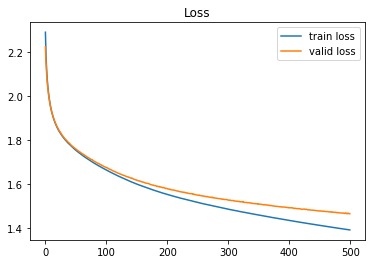

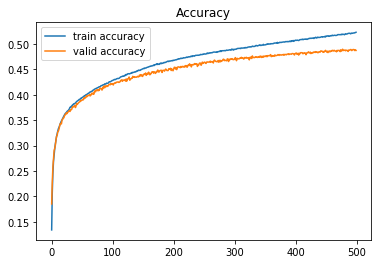

In [10]:
calc('sgd', 500)